In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '..')

from unpast.utils.eval import generate_exprs
from unpast.utils.method import zscore

# Simulated expression data

* 10000 genes x 200 samples
* background ~N(0,1), bicluster ~ N(4,1)
* four biclusters with fraction [0.05,0.1,0.25,0.5] of all columns (samples) simulate four subtypes
* n=5,50,500 rows (features) per bicluster 
* opt. co-expression modules of user-defined size with avg. Pearson r about 0.5 added to the background


# Scenario C 
* overlapping sample clusters 
* four 500-feature co-expression modules added to the background
* ! only 1000 background genes are shown


In [3]:
# background expressions N(0,1)
seed = 42
# dimensions of the matrix
n_genes = 10000 # gemes 
N = 200  # samples

# bicluster expression parameters
m = 4
std = 1

# fractions of samples included to each subtype
frac_samples= [0.05, 0.1, 0.25, 0.5]

# number of biomarkers for each subtype
n_biomarkers = 500

# add 4 co-expression modules of 500 genes each, with avg. r=0.5 
add_coexpressed = [500]*4 


In [4]:
show_n_bg = 3000 # how many background feature to display

	co-exprs. module  500 r= 0.5222997255460397
	co-exprs. module  500 r= 0.45939626447003495
	co-exprs. module  500 r= 0.5686997578884468
	co-exprs. module  500 r= 0.5284840401022982


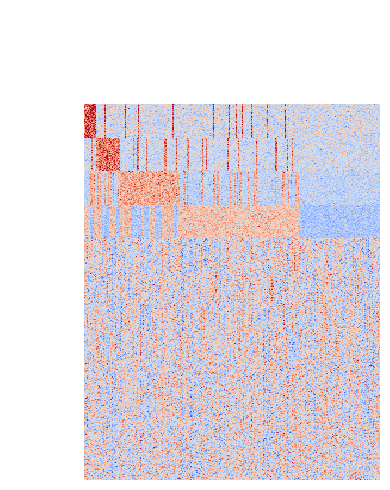

In [7]:
exprs, ground_truth,coexpressed_modules = generate_exprs((n_genes,N),
                                                         g_size=n_biomarkers,
                                                         frac_samples=frac_samples,
                                                         m=m,std=std,
                                                         #outdir = ,outfile_basename=, # specify to save data
                                                         g_overlap=False,s_overlap=True,
                                                         seed = seed, 
                                                         add_coexpressed = add_coexpressed)




bic_g = []
bic_s = []
for row in ground_truth.iterrows():
    bic = row[1]
    g = list(bic["genes"])
    s = list(bic["samples"])
    bic_g += g
    bic_s += s
    

for module in coexpressed_modules:
    bic_g +=  [x for x in module if not x in bic_g]

coexprs_g = set([])
for cm in coexpressed_modules:
    coexprs_g|= set(cm)
    
bg_g = set(exprs.index.values).difference(set(bic_g))
bg_g = bg_g.difference(coexprs_g)
bg_s = set(exprs.columns.values).difference(set(bic_s))

samples = bic_s + list(bg_s)
genes = bic_g + list(coexprs_g)+ list(bg_g)[:min(0,show_n_bg -len(coexprs_g))]

exprs = zscore(exprs)
figC = sns.clustermap(zscore(exprs.loc[genes,samples]),
                    xticklabels=False,yticklabels=False,
                    row_cluster=False,col_cluster=False,
                    cmap=sns.color_palette("coolwarm", as_cmap=True),
                    vmin=-3,vmax=3,
                   figsize = (4,5))

figC.ax_cbar.set_visible(False) # switch on/off colorbar
#figC.savefig("img/Fig3C.png", transparent=True)

# Scenario B
* same as C, but without co-expression modules

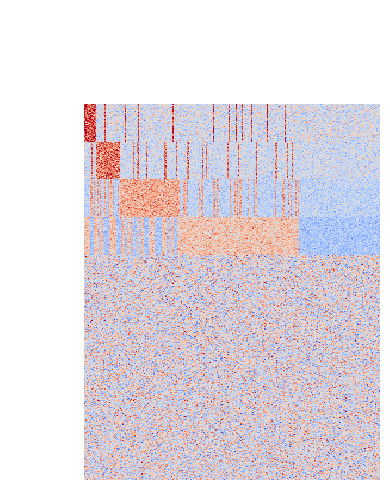

In [8]:
exprs, ground_truth,coexpressed_modules = generate_exprs((n_genes,N),
                                                         g_size=n_biomarkers,
                                                         frac_samples=frac_samples,
                                                         m=m,std=std,
                                                         #outdir =,outfile_basename=, # specify to save data
                                                         g_overlap=False,s_overlap=True,
                                                         seed = seed, 
                                                         #add_coexpressed = add_coexpressed
                                                        )




bic_g = []
bic_s = []
for row in ground_truth.iterrows():
    bic = row[1]
    g = list(bic["genes"])
    s = list(bic["samples"])
    bic_g += g
    bic_s += s
    
    
bg_g = set(exprs.index.values).difference(set(bic_g))
bg_s = set(exprs.columns.values).difference(set(bic_s))

samples = bic_s + list(bg_s)
genes = bic_g + list(bg_g)[:show_n_bg]

exprs = zscore(exprs)
figB = sns.clustermap(zscore(exprs.loc[genes,samples]),
                    xticklabels=False,yticklabels=False,
                    row_cluster=False,col_cluster=False,
                    cmap=sns.color_palette("coolwarm", as_cmap=True),
                    vmin=-3,vmax=3,
                   figsize = (4,5))

figB.ax_cbar.set_visible(False) # swithc on/off colorbar
#figB.savefig("img/Fig3/B.png", transparent=True) 

# Scenario A
* same as B, but sample sets are mutually exclusive (g_overlap=False,s_overlap=False)

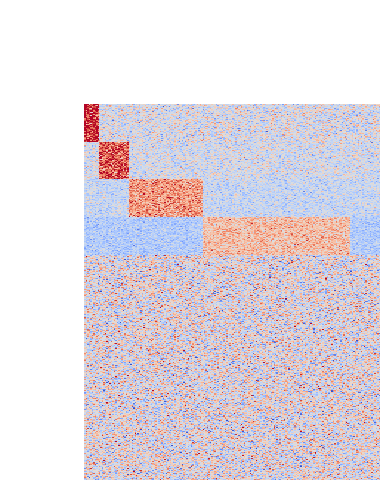

In [9]:
exprs, ground_truth,coexpressed_modules = generate_exprs((n_genes,N),
                                                         g_size=n_biomarkers,
                                                         frac_samples=frac_samples,
                                                         m=m,std=std,
                                                         #outdir = False,outfile_basename=False, 
                                                         g_overlap=False,s_overlap=False,
                                                         seed = seed, 
                                                         #add_coexpressed = add_coexpressed
                                                        )




bic_g = []
bic_s = []
for row in ground_truth.iterrows():
    bic = row[1]
    g = list(bic["genes"])
    s = list(bic["samples"])
    bic_g += g
    bic_s += s
    
    
bg_g = set(exprs.index.values).difference(set(bic_g))
bg_s = set(exprs.columns.values).difference(set(bic_s))

samples = bic_s + list(bg_s)
genes = bic_g + list(bg_g)[:show_n_bg]

exprs = zscore(exprs)
figA = sns.clustermap(zscore(exprs.loc[genes,samples]),
                    xticklabels=False,yticklabels=False,
                    row_cluster=False,col_cluster=False,
                    cmap=sns.color_palette("coolwarm", as_cmap=True),
                    vmin=-3,vmax=3,
                    figsize = (4,5),
                   )

figA.ax_cbar.set_visible(False) # swithc on/off colorbar
#figA.savefig("img/Fig3/A.png", transparent=True)

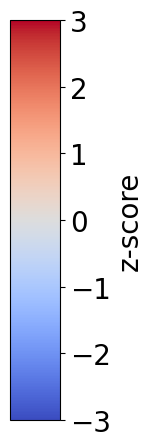

In [10]:
# Get the figure and colorbar axes
fig = figA.fig
cbar_ax = figA.ax_cbar

# Create a new figure for the colorbar only
fig_cbar = plt.figure(figsize=(0.5, 4))
new_ax = fig_cbar.add_axes([0, 0, 1, 1])
# Transfer the colorbar to new figure
if cbar_ax.collections:  # Check if there is a colorbar
    cb = plt.colorbar(cbar_ax.collections[1], cax=new_ax, orientation='vertical')
    cb.set_label('z-score', fontsize=20)
    cb.ax.tick_params(labelsize=20)

# Save the colorbar figure
#fig_cbar.savefig("img/Fig3/cbar.png", transparent=True)
